## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Importation des données du csv

In [2]:
data_path = "./assets/bank_data/BankChurners.csv"
data = pd.read_csv(data_path)
data.head

<bound method NDFrame.head of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_C

## Affichage général sur des données

In [3]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [4]:
print(data.shape)

(10127, 23)


In [5]:
print(data.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
data.drop_duplicates()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## Transformation des données type chaîne de caractères (data)

- Ma fonction de mapping :

In [8]:
def stringtoint_auto(df, column):
    if column in df.columns:
        uniques = df[column].dropna().unique()
        print(uniques)
        mapping = {val: idx for idx, val in enumerate(sorted(uniques))}
        print(mapping)
        df[column] = df[column].map(mapping)
        return df
    else:
        raise ValueError(f"❌ Colonne '{column}' absente du DataFrame.")

- Mapping :

In [9]:
data = data.rename(columns={
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Bayes1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Bayes2"
})

In [10]:
data = stringtoint_auto(data, 'Attrition_Flag') # 'Attrited Customer': 0, 'Existing Customer': 1
data.head()

['Existing Customer' 'Attrited Customer']
{'Attrited Customer': 0, 'Existing Customer': 1}


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [11]:
data = stringtoint_auto(data, 'Gender') # 'F': 0, 'M': 1
data.head()

['M' 'F']
{'F': 0, 'M': 1}


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [12]:
data = stringtoint_auto(data, 'Education_Level') # 'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6
data.head()

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,768805383,1,45,1,3,3,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [13]:
data = stringtoint_auto(data, 'Marital_Status') # 'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3
data.head()

['Married' 'Single' 'Unknown' 'Divorced']
{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,768805383,1,45,1,3,3,1,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [14]:
data["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [15]:
data["Income_Category"] = data["Income_Category"].map({'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4, 'Unknown':5})
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,768805383,1,45,1,3,3,1,2,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,0,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,0,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [16]:
data = stringtoint_auto(data, 'Card_Category') # 'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3
data.head()

['Blue' 'Gold' 'Silver' 'Platinum']
{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,0,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,0,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Tentative différentes en générant des One-Hot Ending (data2_encoded)

In [17]:
data2 = pd.read_csv(data_path)
data2 = data2.rename(columns={
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Bayes1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Bayes2"
})
data2.head

<bound method NDFrame.head of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_C

In [18]:
categorical_cols = ["Education_Level", "Income_Category", "Card_Category", "Marital_Status", "Gender"]
data2_encoded = pd.get_dummies(data2, columns=categorical_cols, drop_first=True)


In [19]:
data2_encoded = stringtoint_auto(data2_encoded, 'Attrition_Flag') # 'Attrited Customer': 0, 'Existing Customer': 1
data.head()

['Existing Customer' 'Attrited Customer']
{'Attrited Customer': 0, 'Existing Customer': 1}


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Bayes1,Bayes2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,0,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,0,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [20]:
data2_encoded.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_M
0,768805383,1,45,3,39,5,1,3,12691.0,777,...,False,False,False,False,False,False,True,False,False,True
1,818770008,1,49,5,44,6,1,2,8256.0,864,...,False,True,False,False,False,False,False,True,False,False
2,713982108,1,51,3,36,4,1,0,3418.0,0,...,True,False,False,False,False,False,True,False,False,True
3,769911858,1,40,4,34,3,4,1,3313.0,2517,...,False,True,False,False,False,False,False,False,True,False
4,709106358,1,40,3,21,5,1,0,4716.0,0,...,False,False,False,False,False,False,True,False,False,True


## Distribution des données (data)

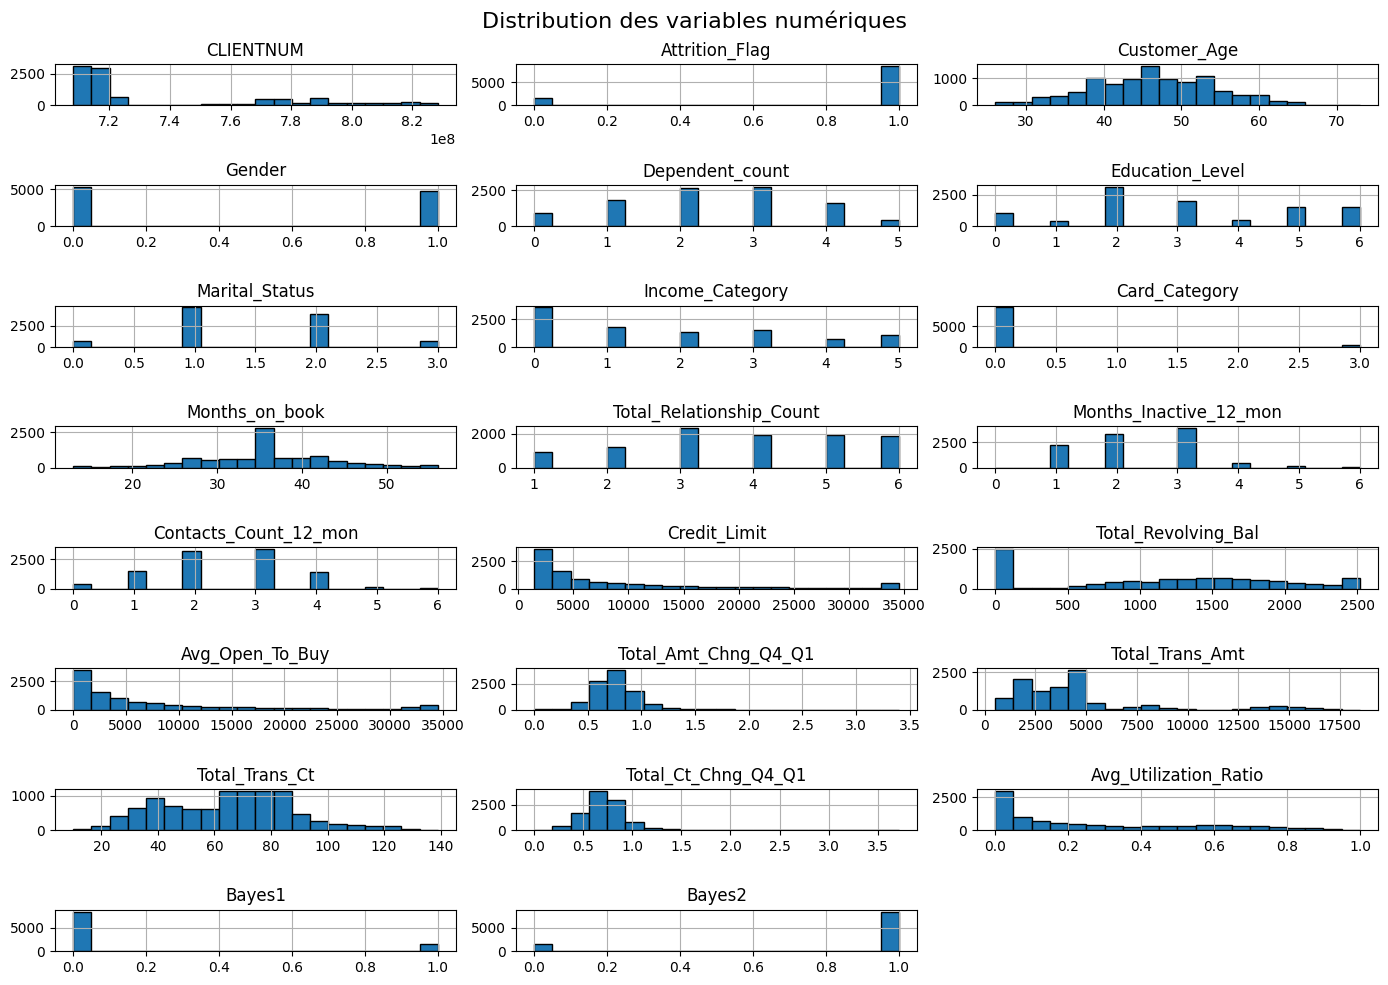

In [21]:
data.hist(
    figsize=(14, 10), 
    bins=20, 
    layout=(math.ceil(len(data.select_dtypes(include='number').columns)/3), 3),
    edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()

## Matrice de corrélation (data)

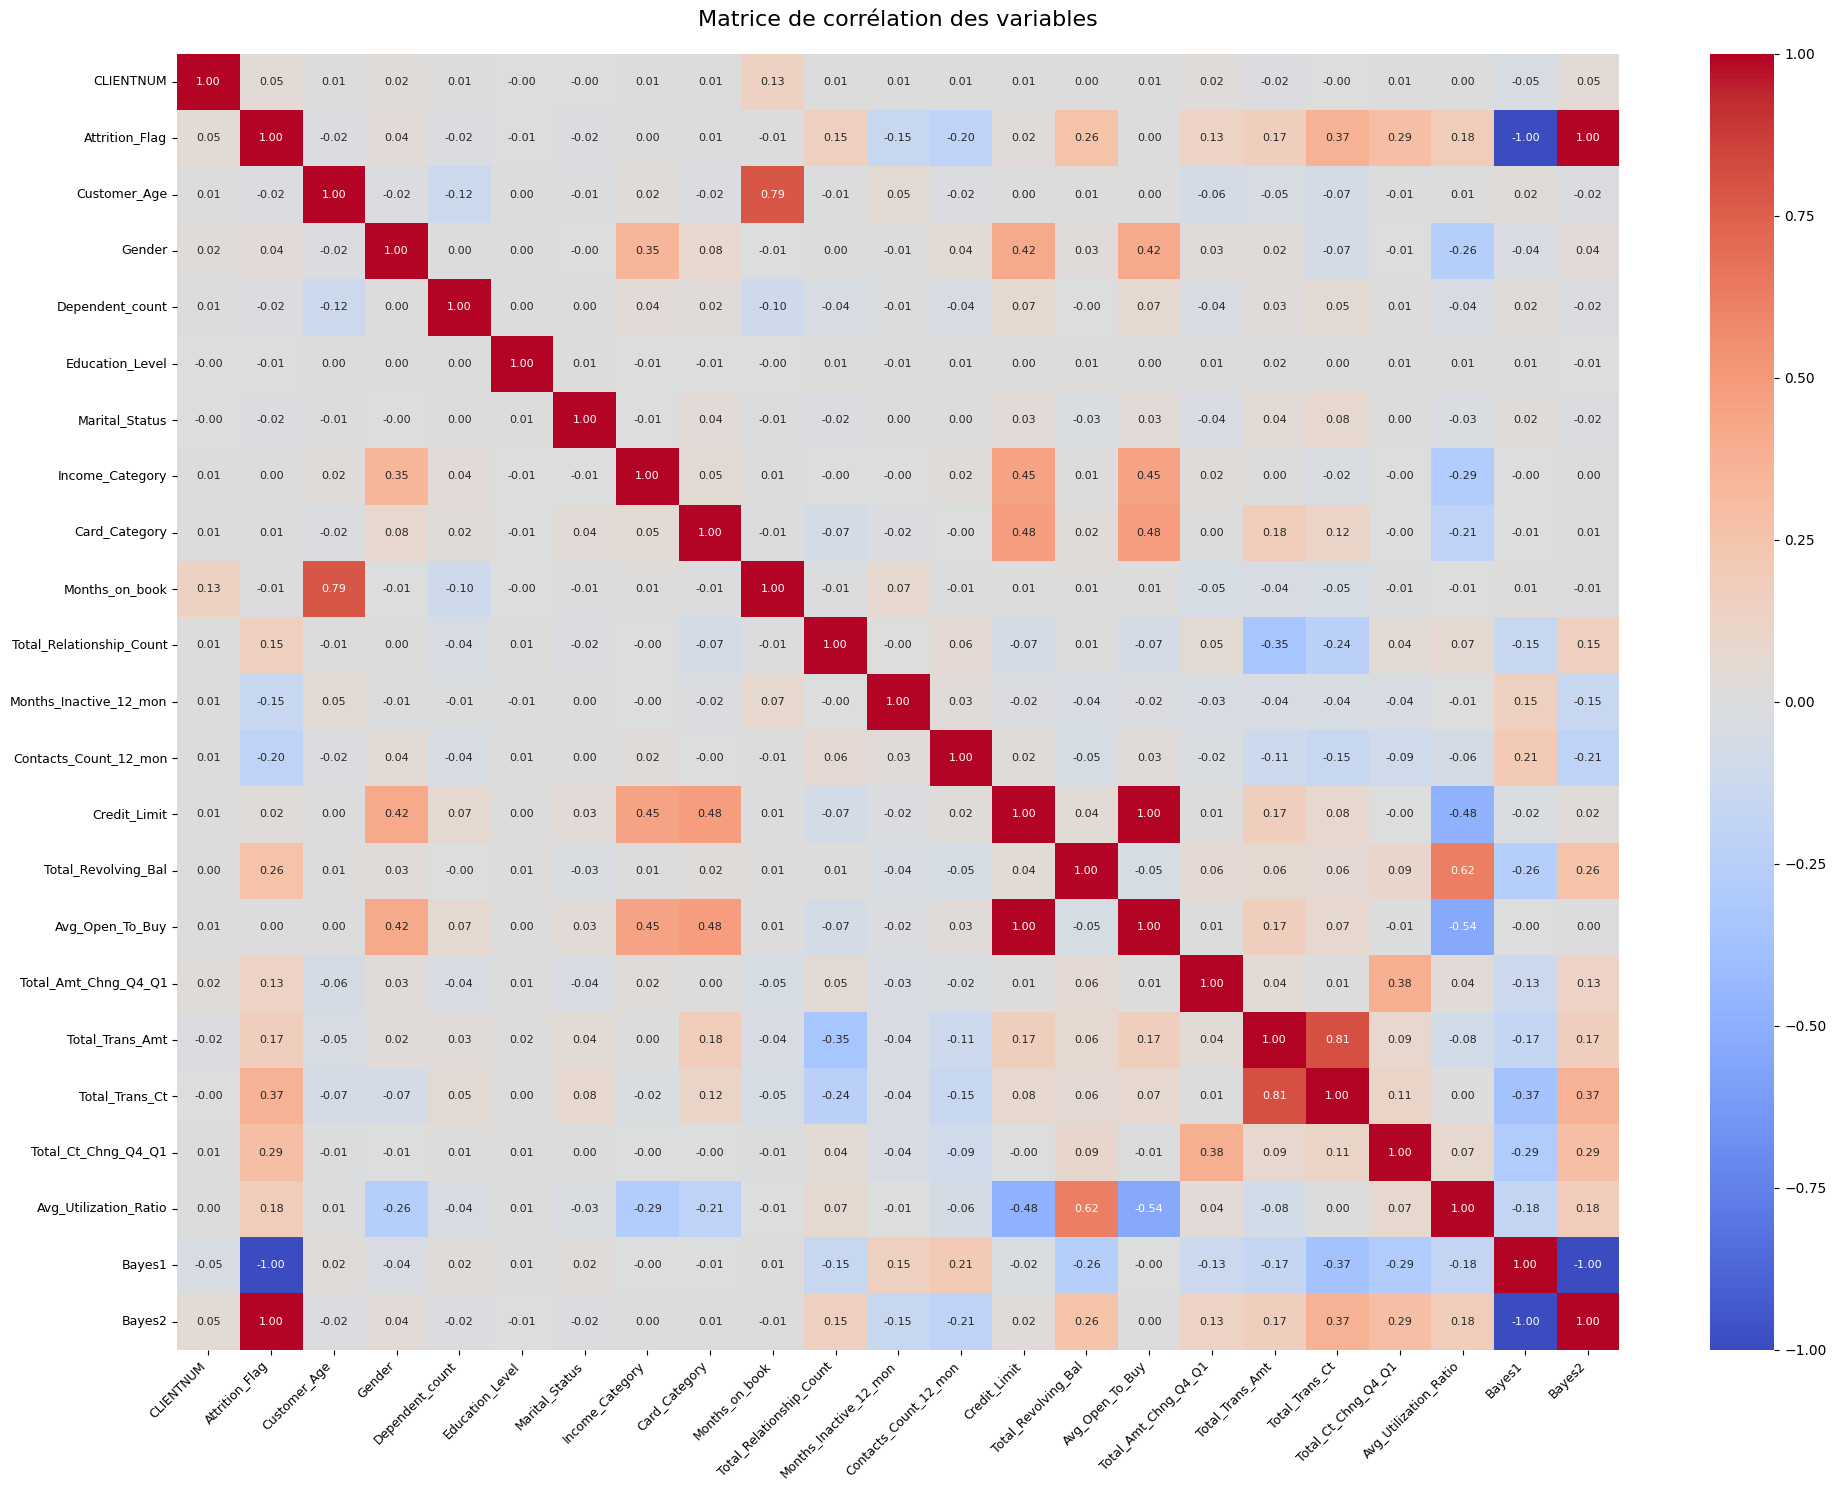

In [22]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    data.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 8}
)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right", fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)

plt.title("Matrice de corrélation des variables", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Distribution des données (data2_encoded)

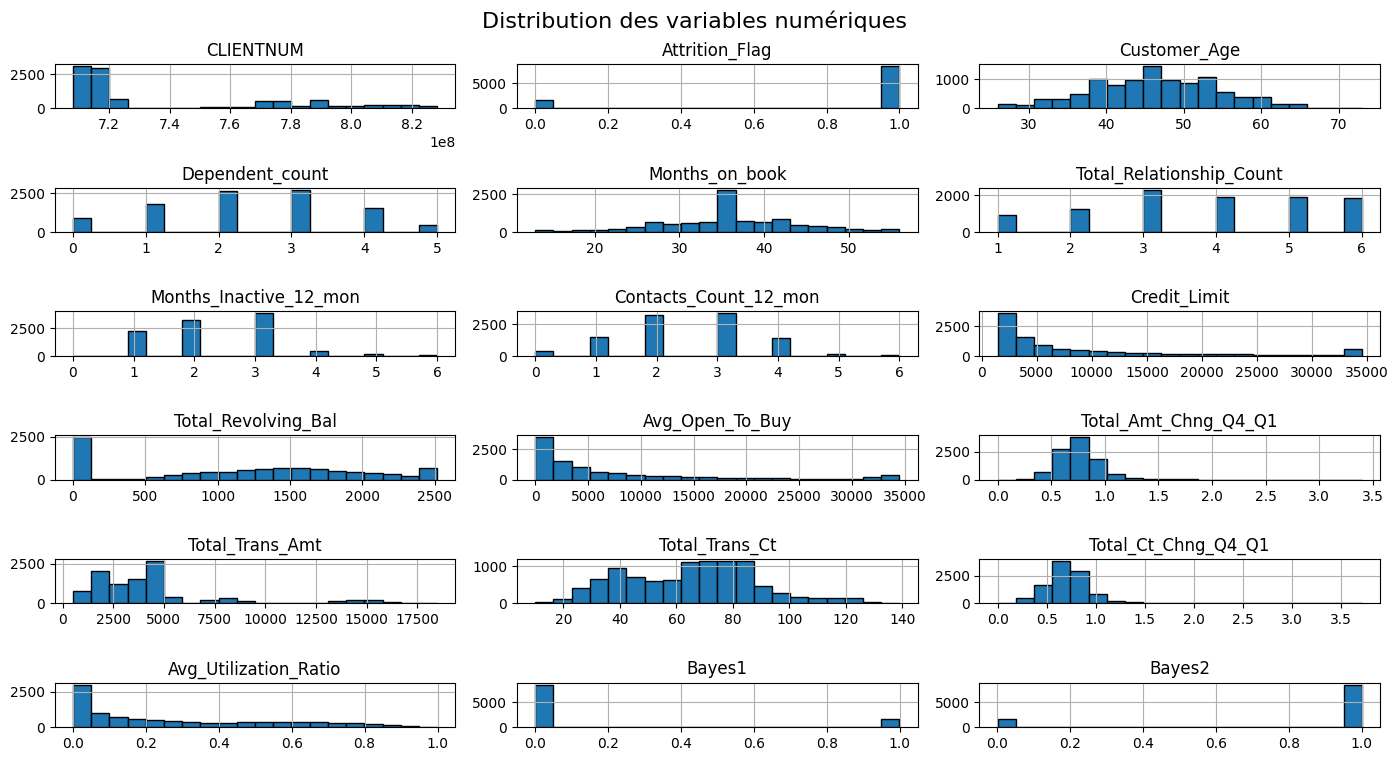

In [23]:
data2_encoded.hist(
    figsize=(14, 10), 
    bins=20, 
    layout=(math.ceil(len(data.select_dtypes(include='number').columns)/3), 3),
    edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()

## Matrice de corrélation (data2_encoded)

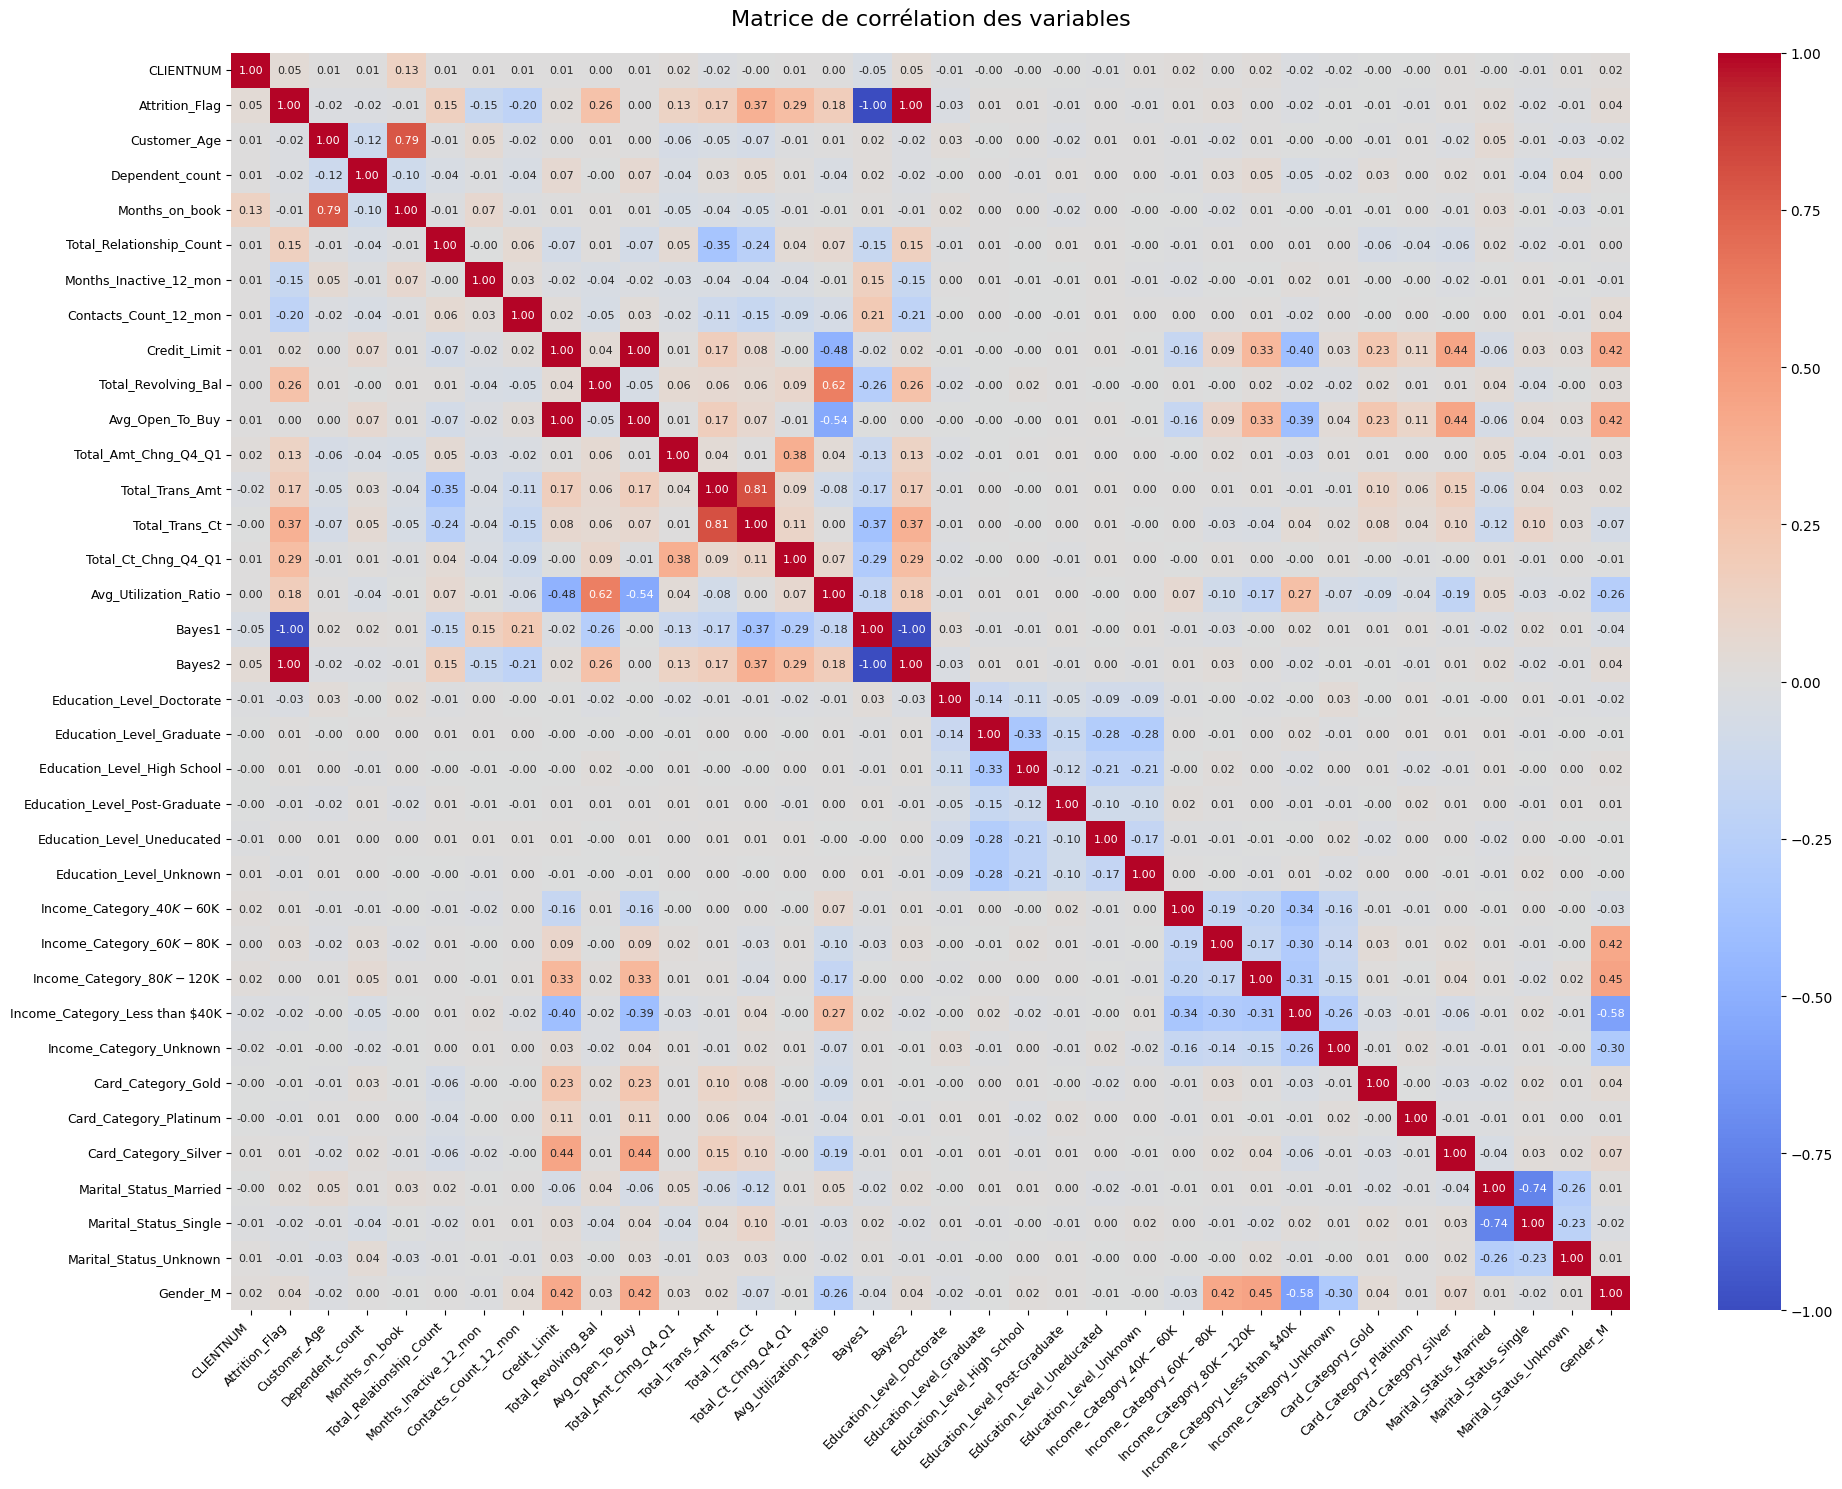

In [24]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    data2_encoded.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 8}
)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right", fontsize=9)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)

plt.title("Matrice de corrélation des variables", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Les colonnes, ici renommées Bayes1 et Bayes2, sont des copies de Attrition_Flag (et inverse) confirmées par les coefficients de corrélation à 1 et -1. Nous pouvons envisager la suppression de ces colonnes du dataset.

## Allègement du dataset

In [25]:
data.drop(columns=["Bayes1"], inplace=True)
data.drop(columns=["Bayes2"], inplace=True)
data.drop(columns=["CLIENTNUM"], inplace=True)

In [26]:
data2_encoded.drop(columns=["Bayes1"], inplace=True)
data2_encoded.drop(columns=["Bayes2"], inplace=True)
data2_encoded.drop(columns=["CLIENTNUM"], inplace=True)

## Préparation train/test (data)

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Attrition_Flag"])
y = data["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Standardisation/Normalisation de data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Préparation train/test (data2_encoded)

In [29]:
from sklearn.model_selection import train_test_split

X2 = data2_encoded.drop(columns=["Attrition_Flag"])
y2 = data2_encoded["Attrition_Flag"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, stratify=y2, random_state=42
)


## Régression Logistique (data)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Création du modèle
model = LogisticRegression(max_iter=10000, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(report)

Accuracy : 0.9028
Matrice de confusion :
[[ 179  146]
 [  51 1650]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.55      0.65       325
           1       0.92      0.97      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.90      0.90      0.90      2026



/Users/macbook/Dev/ML/ML - Jour 2/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Le modèle prédit majoritairement la réponse la plus représentée du dataset. Nous devons essayer en imaginant que les 2 statuts de Attrition_Flag sont représentés de la même manière dans le dataset.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Création du modèle
model2 = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')

# Entraînement du modèle
model2.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = model2.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(report)

Accuracy : 0.8282
Matrice de confusion :
[[ 268   57]
 [ 291 1410]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.48      0.82      0.61       325
           1       0.96      0.83      0.89      1701

    accuracy                           0.83      2026
   macro avg       0.72      0.83      0.75      2026
weighted avg       0.88      0.83      0.84      2026



/Users/macbook/Dev/ML/ML - Jour 2/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Régression Logistique (data2_encoded)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Création du modèle
model_data2 = LogisticRegression(max_iter=10000, random_state=42)

# Entraînement du modèle
model_data2.fit(X2_train, y2_train)

# Prédiction sur le jeu de test
y2_pred = model_data2.predict(X2_test)

# Évaluation du modèle
accuracy2 = accuracy_score(y2_test, y2_pred)
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
report2 = classification_report(y2_test, y2_pred)

print(f"Accuracy : {accuracy2:.4f}")
print("Matrice de confusion :")
print(conf_matrix2)
print("Rapport de classification :")
print(report2)

Accuracy : 0.9018
Matrice de confusion :
[[ 182  143]
 [  56 1645]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.56      0.65       325
           1       0.92      0.97      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.90      0.90      0.90      2026



/Users/macbook/Dev/ML/ML - Jour 2/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Création du modèle
model2_data2 = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')

# Entraînement du modèle
model2_data2.fit(X2_train, y2_train)

# Prédiction sur le jeu de test
y2_pred = model2_data2.predict(X2_test)

# Évaluation du modèle
accuracy2 = accuracy_score(y2_test, y2_pred)
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
report2 = classification_report(y2_test, y2_pred)

print(f"Accuracy : {accuracy2:.4f}")
print("Matrice de confusion :")
print(conf_matrix2)
print("Rapport de classification :")
print(report2)

Accuracy : 0.8361
Matrice de confusion :
[[ 273   52]
 [ 280 1421]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.49      0.84      0.62       325
           1       0.96      0.84      0.90      1701

    accuracy                           0.84      2026
   macro avg       0.73      0.84      0.76      2026
weighted avg       0.89      0.84      0.85      2026



/Users/macbook/Dev/ML/ML - Jour 2/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Nous avons les mêmes résultats avec le formattage des données différents. Nous abandonnons ce jeu de données.

## Régression Logistique de data avec standardisation

Suite au warning de la regression logistique sur la non convergence au max des itérations, nous standardisons les données d'entrée pour faciliter la convergence.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Création du modèle
model_scaled = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')

# Entraînement du modèle
model_scaled.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred = model_scaled.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(report)

Accuracy : 0.8411
Matrice de confusion :
[[ 273   52]
 [ 270 1431]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.50      0.84      0.63       325
           1       0.96      0.84      0.90      1701

    accuracy                           0.84      2026
   macro avg       0.73      0.84      0.76      2026
weighted avg       0.89      0.84      0.86      2026



## Validation croisée sur data

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(model_scaled, X_train_scaled, y_train, cv=10)
print("Scores CV :", cv_scores)
print("Score Moyen :", cv_scores.mean())
print("Écart type :", cv_scores.std())

Scores CV : [0.84340321 0.85185185 0.86049383 0.84197531 0.83580247 0.83333333
 0.85555556 0.85061728 0.82962963 0.83580247]
Score Moyen : 0.8438464934313682
Écart type : 0.009848459095144474


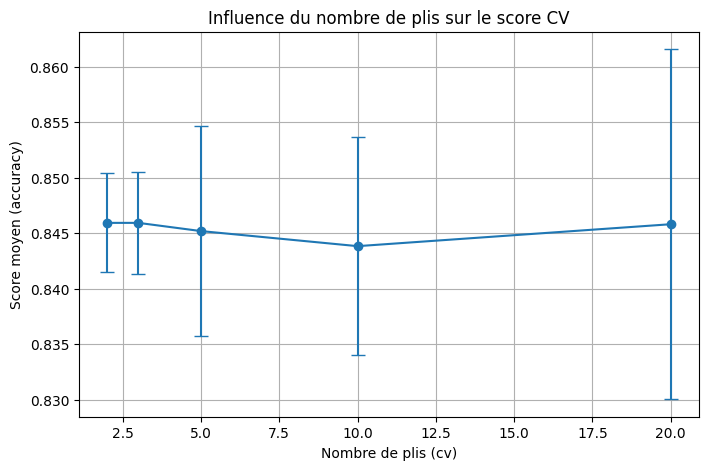

In [36]:
cv_values = [2, 3, 5, 10, 20]  # nombres de plis à tester
mean_scores = []
std_scores = []

for cv in cv_values:
    scores = cross_val_score(model_scaled, X_train_scaled, y_train, cv=cv)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Affichage
plt.figure(figsize=(8,5))
plt.errorbar(cv_values, mean_scores, yerr=std_scores, marker='o', capsize=5)
plt.xlabel('Nombre de plis (cv)')
plt.ylabel('Score moyen (accuracy)')
plt.title('Influence du nombre de plis sur le score CV')
plt.grid(True)
plt.show()

Nous constatons que le nombre plus important de jeux de train n'influe pas sur la précision du modèle, la Régression Logistique effectuée en amont amenait le même résultat.

## Préparation au PCA

In [37]:
data_scaled = scaler.fit_transform(X_train_scaled)


## Application du PCA

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
data_pca = pca.fit_transform(data_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Pour voir ce qui sort du fit_transform :
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca_df.head()

pca.explained_variance_ratio_.cumsum()


array([0.17031116, 0.28136991, 0.37649191, 0.45806043, 0.52572565,
       0.58002182, 0.63339966, 0.68604597, 0.73805185, 0.7895243 ,
       0.83674839, 0.87899827, 0.91292191, 0.94420999, 0.96875736])

On dépasse les 0,95 de variance cumulée à partir du 15ème composant on peut donc considérer un passage de 22 features au départ, 19 features après nettoyage et 15 features après PCA.

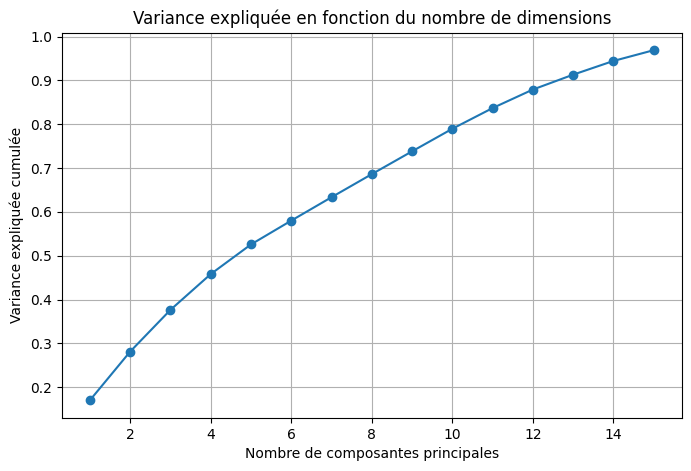

In [39]:
# Variance expliquée cumulée
cum_var_explained = pca.explained_variance_ratio_.cumsum()

# Affichage
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var_explained)+1), cum_var_explained, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée en fonction du nombre de dimensions')
plt.grid(True)
plt.show()

## Régression Logistique sur PCA

In [40]:
# Création du modèle
model_pca = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')

# Entraînement du modèle
model_pca.fit(data_pca, y_train)

# Prédiction sur le jeu de test
y_pred = model_pca.predict(X_test_pca)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(report)

Accuracy : 0.7962
Matrice de confusion :
[[ 247   78]
 [ 335 1366]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.42      0.76      0.54       325
           1       0.95      0.80      0.87      1701

    accuracy                           0.80      2026
   macro avg       0.69      0.78      0.71      2026
weighted avg       0.86      0.80      0.82      2026



On constate que la RL n'est pas améliorée, elle se dégrade même. Le PCA n'est peut être pas adapté vu le faible nombre de feature et son faible redimensionnement.

## Grid Search sur les données résultantes du PCA

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pipeline : Standardisation -> PCA -> Régression Logistique
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression(
        max_iter=10000,
        random_state=42,
        class_weight='balanced'
    ))
])

# Grille d’hyperparamètres
param_grid = {
    'pca__n_components': [5, 10, 12, 15, 18],  
    'clf__C': [0.01, 0.1, 1, 10]                   # valeurs de régularisation testées
}

# GridSearch avec validation croisée
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='balanced_accuracy',     # tu peux mettre 'f1_macro' si classes déséquilibrées
    n_jobs=-1,
    verbose=1,
    error_score='raise'     # pour lever une erreur au lieu de mettre NaN
)

# Fit sur le jeu d’entraînement
grid.fit(X_train, y_train)

# Résultats GridSearch
print("Meilleurs paramètres trouvés :", grid.best_params_)
print("Meilleure accuracy moyenne (CV) :", grid.best_score_)

# Récupération du meilleur modèle
best_model = grid.best_estimator_

# Évaluation sur le jeu de test
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy sur test : {accuracy:.4f}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(report)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres trouvés : {'clf__C': 0.01, 'pca__n_components': 18}
Meilleure accuracy moyenne (CV) : 0.8438034007204044

Accuracy sur test : 0.8391
Matrice de confusion :
[[ 266   59]
 [ 267 1434]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.50      0.82      0.62       325
           1       0.96      0.84      0.90      1701

    accuracy                           0.84      2026
   macro avg       0.73      0.83      0.76      2026
weighted avg       0.89      0.84      0.85      2026



In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pipeline : Standardisation -> PCA -> Régression Logistique
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression(
        max_iter=10000,
        random_state=42,
        class_weight='balanced'
    ))
])

# Grille d’hyperparamètres
param_grid = {
    'pca__n_components': [5, 10, 12, 15, 18],  
    'clf__C': [0.01, 0.1, 1, 10]                   # valeurs de régularisation testées
}

# GridSearch avec validation croisée
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='f1_macro',     # tu peux mettre 'f1_macro' si classes déséquilibrées
    n_jobs=-1,
    verbose=1,
    error_score='raise'     # pour lever une erreur au lieu de mettre NaN
)

# Fit sur le jeu d’entraînement
grid.fit(X_train, y_train)

# Résultats GridSearch
print("Meilleurs paramètres trouvés :", grid.best_params_)
print("Meilleure accuracy moyenne (CV) :", grid.best_score_)

# Récupération du meilleur modèle
best_model = grid.best_estimator_

# Évaluation sur le jeu de test
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy sur test : {accuracy:.4f}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(report)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres trouvés : {'clf__C': 0.01, 'pca__n_components': 18}
Meilleure accuracy moyenne (CV) : 0.769373103445119

Accuracy sur test : 0.8391
Matrice de confusion :
[[ 266   59]
 [ 267 1434]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.50      0.82      0.62       325
           1       0.96      0.84      0.90      1701

    accuracy                           0.84      2026
   macro avg       0.73      0.83      0.76      2026
weighted avg       0.89      0.84      0.85      2026



## Test d'une proposition "GPT"

In [46]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# ==============================
# Pipeline : Standardisation -> PCA -> Régression Logistique
# ==============================
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression(
        max_iter=10000,
        random_state=42,
        class_weight='balanced'
    ))
])

# ==============================
# Grille d’hyperparamètres élargie
# ==============================
param_grid = {
    'pca__n_components': [None, 5, 10, 12, 15, 18],
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga']  # pour supporter l1 et l2
}

# ==============================
# Validation croisée stratifiée
# ==============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_macro',   # métrique principale
    n_jobs=-1,
    verbose=1
)

# ==============================
# Fit sur le jeu d’entraînement
# ==============================
grid.fit(X_train, y_train)

# ==============================
# Résultats GridSearch
# ==============================
print("Meilleurs paramètres trouvés :", grid.best_params_)
print("Meilleur score moyen (CV f1_macro) :", grid.best_score_)

# Résultats complets sous forme de DataFrame
results = pd.DataFrame(grid.cv_results_)
results_sorted = results[['param_pca__n_components', 'param_clf__C',
                          'param_clf__penalty', 'param_clf__solver',
                          'mean_test_score', 'rank_test_score']]\
                          .sort_values('rank_test_score')

print("\nTop 10 des modèles testés :")
print(results_sorted.head(10))

# ==============================
# Évaluation sur le jeu de test
# ==============================
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy sur test : {accuracy:.4f}")
print("\nMatrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", report)

# ==============================
# Sauvegarde du meilleur modèle
# ==============================
# joblib.dump(best_model, "best_pca_logreg.pkl")
# print("\n✅ Modèle sauvegardé dans best_pca_logreg.pkl")


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Meilleurs paramètres trouvés : {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'pca__n_components': None}
Meilleur score moyen (CV f1_macro) : 0.7695621993144706

Top 10 des modèles testés :
    param_pca__n_components  param_clf__C param_clf__penalty  \
71                       18           0.1                 l2   
66                     None           0.1                 l2   
59                       18           0.1                 l1   
54                     None           0.1                 l1   
101                      18          10.0                 l1   
96                     None          10.0                 l1   
95                       18           1.0                 l2   
90                     None           1.0                 l2   
77                       18           1.0                 l1   
72                     None           1.0                 l1   

    param_clf__solver  mean_

## Conclusion

Je n'arrive pas à avoir une meilleure précision sur la classe 0 du label. Le déséquilibre des classes ne me permet pas de faire mieux que 0.50.

## Modèles forts

In [48]:
# pip install xgboost
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import joblib

# ==============================
# Liste des modèles à comparer
# ==============================
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=10000, class_weight='balanced', random_state=42
    ),
    "Bagging": BaggingClassifier(
        n_estimators=100, random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=200, max_depth=None, class_weight='balanced', random_state=42
    ),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False,
        eval_metric='logloss', random_state=42
    )
}

# ==============================
# Validation croisée
# ==============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ==============================
# Résultats
# ==============================
results = []

for name, model in models.items():
    print(f"\n==== Entraînement et évaluation : {name} ====")
    
    # Pipeline avec StandardScaler pour les modèles sensibles (LogisticRegression, Bagging)
    if name in ["LogisticRegression", "Bagging"]:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipe = Pipeline([
            ('model', model)
        ])
    
    # Fit sur le jeu d'entraînement
    pipe.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipe.predict(X_test)
    
    # Scores
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    
    print(f"Accuracy : {accuracy:.4f}")
    print("Matrice de confusion :\n", conf_matrix)
    print("Rapport de classification :\n", report)
    
    # Sauvegarde du modèle
    joblib.dump(pipe, f"best_model_{name}.pkl")
    
    # Stockage des résultats
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'ConfusionMatrix': conf_matrix,
        'ClassificationReport': report
    })

# ==============================
# Comparatif résumé
# ==============================
summary = pd.DataFrame({
    'Model': [r['Model'] for r in results],
    'Accuracy': [r['Accuracy'] for r in results]
}).sort_values(by='Accuracy', ascending=False)

print("\n=== Comparatif des modèles ===")
print(summary)



==== Entraînement et évaluation : LogisticRegression ====
Accuracy : 0.8411
Matrice de confusion :
 [[ 273   52]
 [ 270 1431]]
Rapport de classification :
               precision    recall  f1-score   support

           0     0.5028    0.8400    0.6290       325
           1     0.9649    0.8413    0.8989      1701

    accuracy                         0.8411      2026
   macro avg     0.7338    0.8406    0.7640      2026
weighted avg     0.8908    0.8411    0.8556      2026


==== Entraînement et évaluation : Bagging ====
Accuracy : 0.9625
Matrice de confusion :
 [[ 284   41]
 [  35 1666]]
Rapport de classification :
               precision    recall  f1-score   support

           0     0.8903    0.8738    0.8820       325
           1     0.9760    0.9794    0.9777      1701

    accuracy                         0.9625      2026
   macro avg     0.9331    0.9266    0.9298      2026
weighted avg     0.9622    0.9625    0.9623      2026


==== Entraînement et évaluation : RandomFo

/Users/macbook/Dev/ML/ML - Jour 2/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [11:36:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 0.9748
Matrice de confusion :
 [[ 299   26]
 [  25 1676]]
Rapport de classification :
               precision    recall  f1-score   support

           0     0.9228    0.9200    0.9214       325
           1     0.9847    0.9853    0.9850      1701

    accuracy                         0.9748      2026
   macro avg     0.9538    0.9527    0.9532      2026
weighted avg     0.9748    0.9748    0.9748      2026


=== Comparatif des modèles ===
                Model  Accuracy
3             XGBoost  0.974827
1             Bagging  0.962488
2        RandomForest  0.960020
0  LogisticRegression  0.841066


## Conclusion finale

- XGBoost est clairement plus efficace que les autres modèles,
- Bagging et RandomForest sont aussi au dessus de la Regression Logistique,
- La Regression Logistique est un modèle rapide et facilement interprétable de mon point de vue mais elle gère très mal la classe sous-représentée.